# Import 

In [1]:
# pip install -r requirements.txt

In [91]:
import cv2 
import pytesseract
import matplotlib.pyplot as plt
import numpy as np, pandas as pd
from pdf2image import convert_from_path
import tqdm

# PDF2IMAGE 

In [3]:
current_path = !pwd
PDF_file = f'{current_path[0]}/spb short.pdf'
pdf_pages = convert_from_path(PDF_file, 500)

In [4]:
for page_enumeration, page in enumerate(pdf_pages, start=1):
        # Create a file name to store the image
        filename = f"./test_page_{page_enumeration:03}.jpg"
        page.save(filename, "JPEG")
#         image_file_list.append(filename)

# OCR

## Preprocess fucntions 

In [5]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

## Test 

In [8]:
custom_config = r'-l rus --oem 3 --psm 1'

In [100]:
img = cv2.imread('page_001.jpg', cv2.IMREAD_GRAYSCALE)[2000:]

286it [00:00, 7720.99it/s]


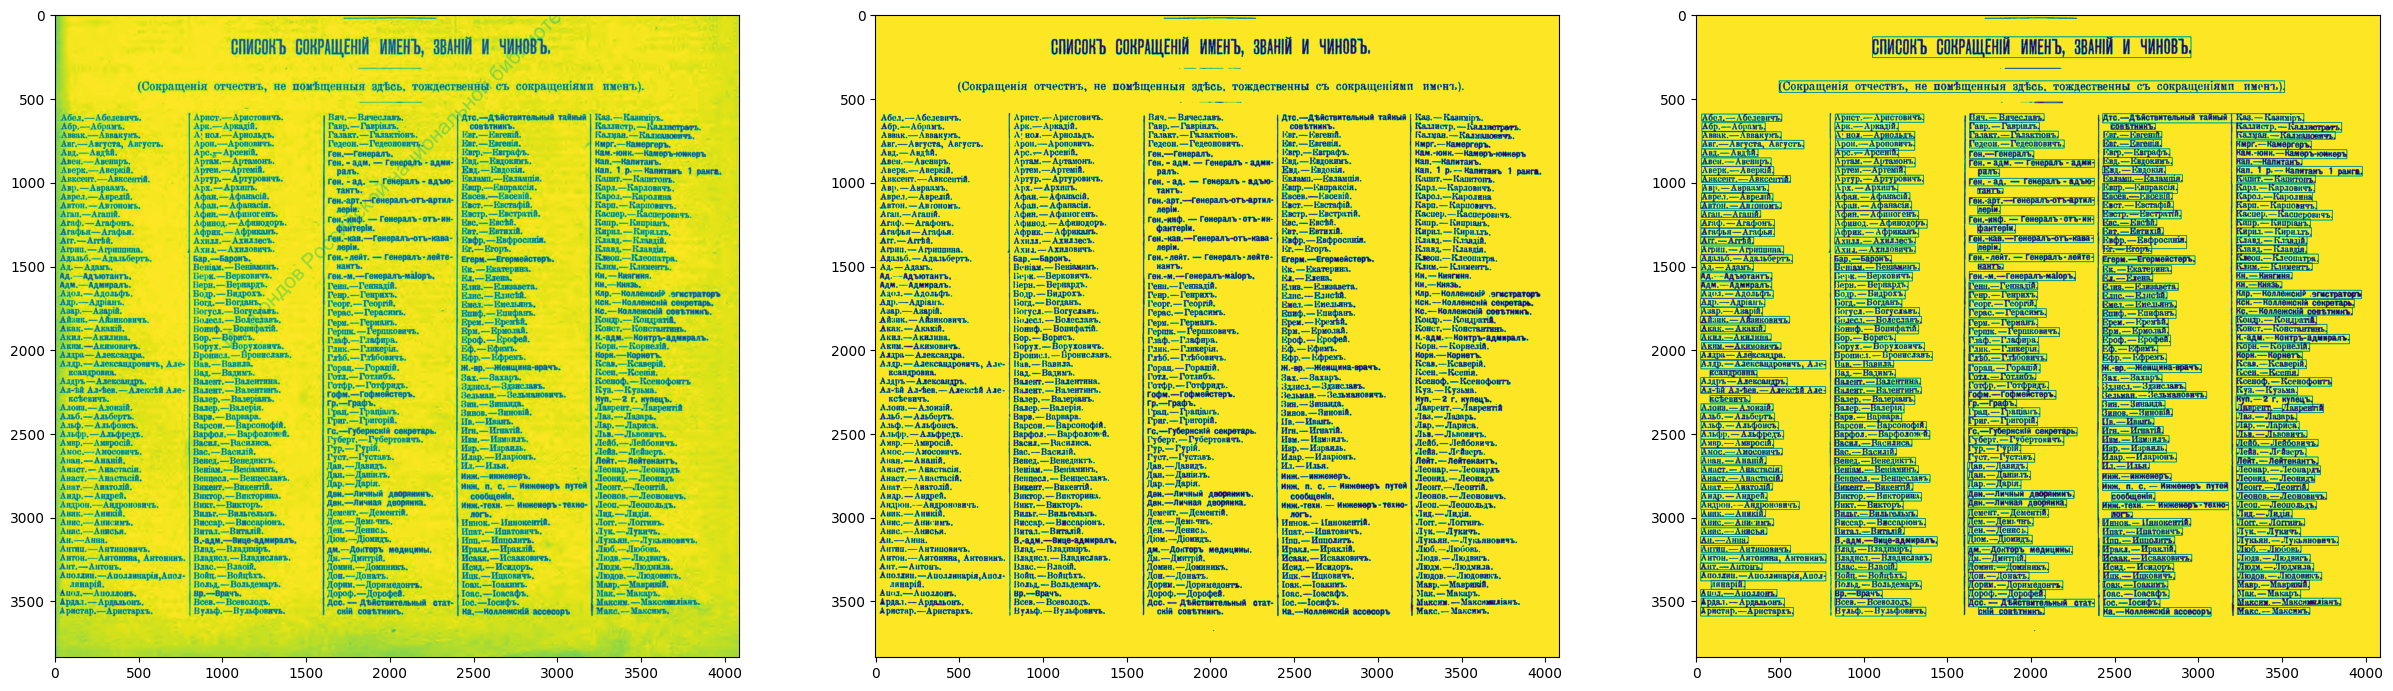

In [113]:
thresh = 160
ret,thresh_img = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)
output = thresh_img.copy()

image_dict = pytesseract.image_to_data(thresh_img
                              , output_type=pytesseract.Output.DICT
                              , config=custom_config)
image_df = pd.DataFrame.from_dict(image_dict)
image_df['text_len'] = image_df.text.str.len()
image_df.query('level == 4',inplace=True)

for index, row in tqdm.tqdm(image_df.iterrows()):
    (x, y, width, height) = row.left, row.top, row.width, row.height
    cv2.rectangle(output, (x, y), (x + width, y + height), (0, 0, 255), 2)
    filename = f'./train_data_rus_old/{index}.png'
    cv2.imwrite(filename, thresh_img[y:y+height,x:x+width]) 

fig, ax = plt.subplots(1,3)
fig.set_size_inches(30, 30)
ax[0].imshow(img)
ax[1].imshow(thresh_img)
ax[2].imshow(output)

# cv2.imshow('contours', output) # выводим итоговое изображение в окно
# cv2.waitKey()
# cv2.destroyAllWindows()

In [10]:
# # img = cv2.imread('page_001.jpg', cv2.IMREAD_GRAYSCALE)[2000:]
# contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# output = img.copy()
# for idx, contour in enumerate(contours):
#     (x, y, w, h) = cv2.boundingRect(contour)
#     # print("R", idx, x, y, w, h, cv2.contourArea(contour), hierarchy[0][idx])
#     # hierarchy[i][0]: the index of the next contour of the same level
#     # hierarchy[i][1]: the index of the previous contour of the same level
#     # hierarchy[i][2]: the index of the first child
#     # hierarchy[i][3]: the index of the parent
#     # if hierarchy[0][idx][3] == -1:
#     # print((x, y, w, h))
#     cv2.rectangle(output, (x, y), (x + w, y + h), (0, 0, 255), 3)
#     cv2.rectangle(output, (100, 100), (200, 200), (0, 0, 255), 10)


# # fig, ax = plt.subplots(1,2)
# # fig.set_size_inches(20, 20)
# # ax[0].imshow(img)
# # ax[1].imshow(output)

# cv2.imshow("Input", img)
# cv2.imshow("Output", output)
# cv2.waitKey(0)

27

In [93]:
thresh_img[y:y+height,x:x+width]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

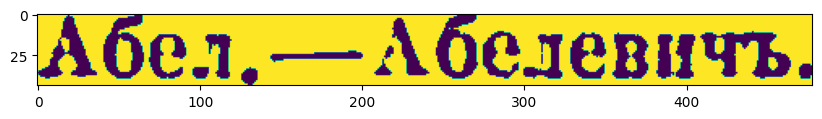

In [62]:
plt.figure(figsize=(10, 10))
top,height,left,width
plt.imshow(thresh_img[591:591+44,34:34+478])

In [85]:
image_df = pd.DataFrame.from_dict(image_dict)
image_df.query('block_num == 4 and level == 4').style

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
28,4,1,4,1,1,0,34,591,478,44,-1,
32,4,1,4,1,2,0,35,643,378,51,-1,
34,4,1,4,1,3,0,36,697,472,50,-1,
37,4,1,4,1,4,0,35,748,609,51,-1,
41,4,1,4,1,5,0,33,800,337,46,-1,
44,4,1,4,1,6,0,32,853,416,50,-1,
48,4,1,4,1,7,0,33,905,431,51,-1,
51,4,1,4,1,8,0,33,958,531,41,-1,
55,4,1,4,1,9,0,37,1012,396,49,-1,
59,4,1,4,1,10,0,32,1064,427,51,-1,


In [46]:
# image_df['text_len'] = image_df.text.str.len()
image_df.style

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,text_len
4,5,1,1,1,1,1,1054,142,325,94,70,СПИСОКЪ,7
5,5,1,1,1,1,2,1439,130,433,124,72,СОКРАЩЕНИ,9
6,5,1,1,1,1,3,1943,142,258,109,72,"ИМЕНЪ,",6
7,5,1,1,1,1,4,2262,130,225,105,41,ЗВАНИ,5
9,5,1,1,1,1,6,2655,140,300,94,65,ЧИНОВЪ.,7
17,5,1,3,1,1,1,496,397,411,65,43,(Сокращения,11
18,5,1,3,1,1,2,952,411,311,49,66,"отчествъ,",9
19,5,1,3,1,1,3,1308,411,70,38,92,не,2
20,5,1,3,1,1,4,1420,398,430,62,73,пом®щенныя,10
21,5,1,3,1,1,5,1894,399,196,62,52,"здЪсь,",6


In [29]:

pytesseract.pytesseract.tesseract_cmd = r'/opt/homebrew/bin/tesseract'
result = pytesseract.image_to_string(img, config=custom_config)
print(result)

СПИСОКЪ СОКРАЩЕНИ ИМЕНЪ, ЭВАНМ И ЧИНОВЪ.

(Сокращеня отчествъ, не пом®щенныя здЪсь, тождественны съ сокращенями именъ).

Абел,— Абелевичъ.
Абр.— Абрамъ.
‚Аввак.— Аввакумъ.
Авг.— Августа, Августь.
Авд.— Авд®й.

Авен.— Авениръ.
Аверк.— Аверюй.
Авксент.— Авксентй.
Авр. — Авраамъ.
Аврел.— Аврелй.
Автон.— Автономъ.
Агап.—-Агашй.
Агаф.— Агафонъ.
Агафья — Агафья.
Агг.— Агг®й.

Агрип.— Агриппина..
Адальб.— Адальбертъ.
Ад.— Адамъ.

Ад.— Адъютантъ,
Адм.— Адмиралъ.

Адол.— Адольфъ.
Адр.— Адр1анъ.

Азар.— Авар!й.
Айзик. — АйзиковичЪ.
Акак.— Акакйй.

Акил.—Акилина.

Аким.—-Акимовичъ.

Алдра— Але

Аллдр. —Алекса.цдровнчъ Але-
ксандровна.

Алдръ— Александръ.

Ал-Ъй Ал-Фев. — Алекс®й Але-
ксВевичъ.

Алоиз.— Алоиз!й.

Альб.— Альбертьъ.

А.тьф — Альфонсъ.
Альфр. — Альфредъ,

Амвр.— Амвросй,

Амос.-—— Амосовичъ,

Анан.— Анашй,

Анаст. — Анастасмя.

Анаст.— Анастас!й.

Анат.— Айатолй.

Андр. — Андрей.

Андрон.— Андроновичъ,

Аник,— Аникйй.

Анис.— Анисимъ.

Анис,— Анисья.

Ан.——Анна.

Антии.— АнтиповичъЪ,

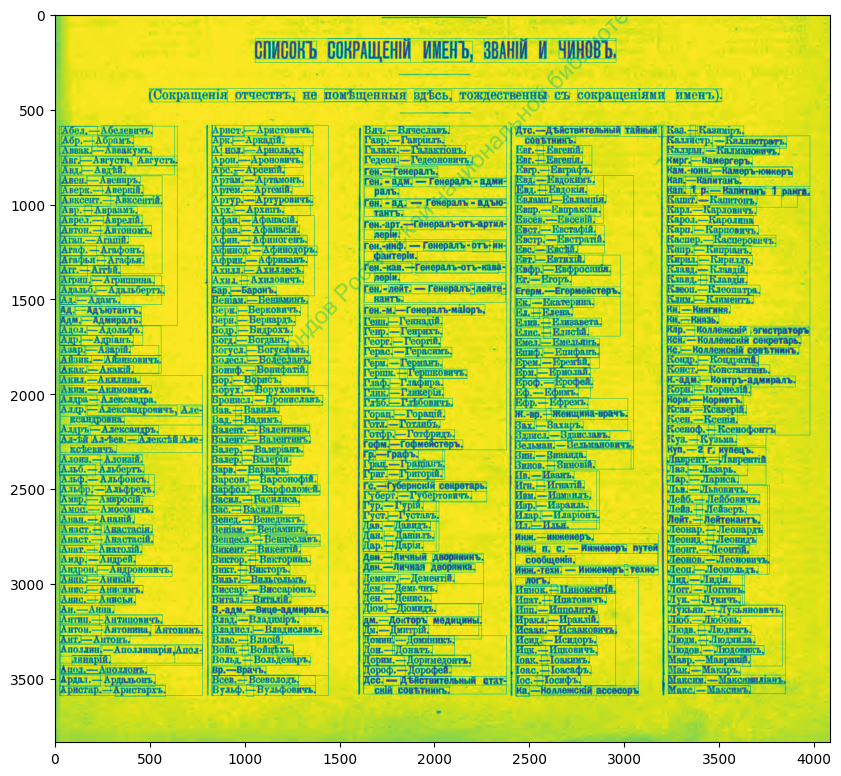

In [30]:
d = pytesseract.image_to_data(img, output_type=pytesseract.Output.DICT, config=custom_config)
n_boxes = len(d['level'])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 1)

plt.figure(figsize=(10, 15))
plt.imshow(img)

In [ ]:
plt.figure(figsize=(10, 15))
plt.imshow(img)

In [ ]:
# image = cv2.imread('aurebesh.jpg')
img = cv2.imread('page_001.jpg')

# gray = get_grayscale(img)
# thresh = thresholding(gray)
# opening = opening(gray)
# canny = canny(gray)

In [ ]:
plt.imshow(img)